In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelBinarizer

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[1 0 1 0 0 0 2 2 1 0] [[0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


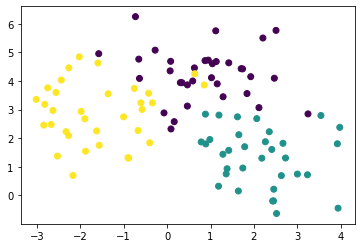

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y)

y_onehot=LabelBinarizer().fit_transform(y)
print(y[:10],y_onehot[:10])

In [56]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [57]:
y=y.reshape((y.shape[0],1))

In [58]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


# 1.Perceptron

In [10]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [11]:
#randn normal distribution
def initialisation(X,y):
    W=np.random.randn(X.shape[1],y.shape[1])
    b=np.random.randn(1)
    return (W,b)

In [12]:
def forward_propagation(X, W, b):
    Z=X.dot(W) + b   
    A=sigmoid(Z)
    return A

In [13]:
def cross_entropy(y, A):
    return 1/len(y) *np.sum(-y*np.log(A)- (1-y)*np.log(1-A))

In [14]:
def gradients(X,A,y):
    dW=(1/len(y)) * np.dot(X.T, (A-y))
    db=(1/len(y)) * np.sum(A-y)
    return(dW,db)

In [15]:
def optimisation(X,W, b, A,y, learning_rate):
    dw, db = gradients(X,A,y)
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return(W,b)

In [22]:
def predict(X, W,b):
    A=forward_propagation(X, W, b)
    return np.argmax(A, axis=1)

In [23]:
def perceptron(X,y,learning_rate=0.1,n_iter=100):
    W,b=initialisation(X,y)
    #Training
    for i in range(n_iter):
        A=forward_propagation(X, W, b)
        loss=cross_entropy(y, A)
        W, b=optimisation(X,W, b, A,y, learning_rate=0.1)
    #prediction
    y_pred=predict(X,W,b)
    
    return (y_pred,W,b)
    
    

In [28]:
def affichage(X, y, y_pred, resolution = 100):
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

  #limites du graphique
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # meshgrid
  x1 = np.linspace(xlim[0], xlim[1], resolution)
  x2 = np.linspace(ylim[0], ylim[1], resolution)
  X1, X2 = np.meshgrid(x1, x2)

  # assembler les 2 variables
  XX = np.vstack((X1.ravel(), X2.ravel())).T

  # Prédictions
  Z = predict(XX, W, b)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
  ax.contour(X1, X2, Z, colors='g')

In [24]:
y_pred,W,b=perceptron(X, y_onehot)

In [25]:
y_pred

array([1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2])

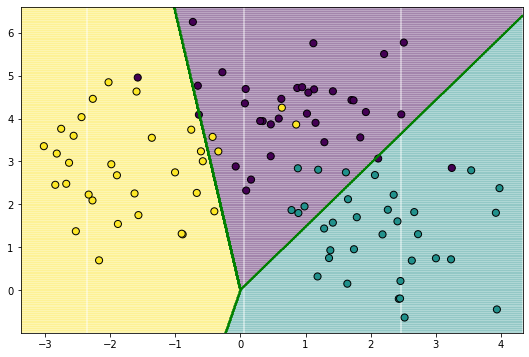

In [31]:
affichage(X, y, y_pred, resolution=500)